In [1]:
import pandas as pd
import time
import requests

### Importing Yearly Standard Deviations

In [5]:
pd.set_option('display.max_columns', None)

# Only set to true if 'passing_distribution.csv' does not exist, or is not up to date
first_time = False

if first_time:
    dics = []
    
    avgs_url = 'https://www.pro-football-reference.com/years/NFL/passing.htm'
    means = pd.read_html(avgs_url, header=1)[0]
    
    time.sleep(3.1)
    
    
    for i in range(1960, 2024):
        url = f'https://www.pro-football-reference.com/years/{i}/passing.htm'
        df = pd.read_html(url)[0]
        if i == 1960:
            gp = 12
        elif 1961 <= i <= 1977:
            gp = 14
        elif i == 1982:
            gp = 9
        elif i == 1987:
            gp = 15
        elif i >= 2021:
            gp = 17
        else:
            gp = 16
    
        min_att = 14*gp
        df = df[df['Att'] >= min_att]
    
        year_dict = {"Year": i, "Mean": means[means['Year'] == str(i)].iloc[0]['ANY/A'], "StD": df['ANY/A'].std()}
    
        dics.append(year_dict)
        print(f"Year {i} Complete!")
    
        time.sleep(3.1)
    
    year_by_year = pd.DataFrame(dics)

    year_by_year.to_csv('passing_distribution.csv')
else:
    year_by_year = pd.read_csv('passing_distribution.csv')[['Year', 'Mean', 'StD']]

# Adding Coefficient of Variation
year_by_year['CV'] = year_by_year["StD"] / year_by_year['Mean'].astype(float)

year_by_year

,Year,Mean,StD,CV
0,1960,4.5,2.390281,0.531174
1,1961,4.9,1.582216,0.322901
2,1962,5.5,1.191261,0.216593
3,1963,4.9,1.204944,0.245907
4,1964,4.6,1.510419,0.328352
...,...,...,...,...
59,2019,6.2,1.122476,0.181045
60,2020,6.4,1.268942,0.198272
61,2021,6.1,1.072539,0.175826
62,2022,5.9,0.975593,0.165355


### List of Quarterbacks with >2000 Pass Attempts

In [7]:
url = 'https://www.pro-football-reference.com/leaders/pass_att_career.htm'
df_att = pd.read_html(url)[0]
df_qual = df_att[df_att['Att'] >= 2000]
df_qual.loc[:, 'Player'] = df_qual['Player'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
df_qual

,Rank,Player,Att,Years,Tm
0,1.0,Tom Brady,12050,2000-2022,2TM
1,2.0,Drew Brees,10551,2001-2020,2TM
2,3.0,Brett Favre,10169,1991-2010,4TM
3,4.0,Peyton Manning,9380,1998-2015,2TM
4,5.0,Matt Ryan,8464,2008-2022,2TM
...,...,...,...,...,...
169,170.0,Teddy Bridgewater,2067,2014-2023,6TM
170,171.0,Josh Freeman,2048,2009-2015,3TM
171,172.0,Rick Mirer,2043,1993-2003,5TM
172,173.0,Trevor Lawrence,2024,2021-2024,jax


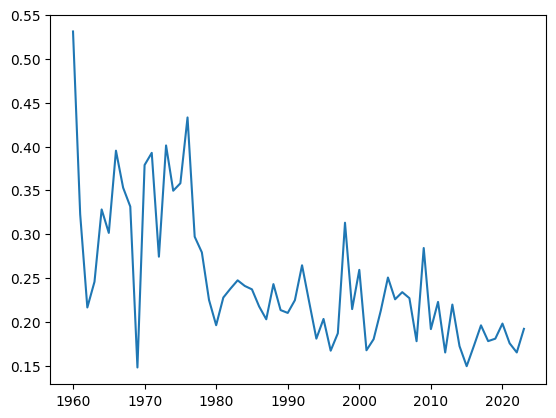

In [33]:
plt.plot(year_by_year['Year'], year_by_year['CV'])